<h1 align="Center">DS 203 Assignment 7 - Machine Learning</h1>
<h3 align="Center">Name: Rohan Rajesh Kalbag</h3>
<h3 align="Center">Roll: 20d170033</h3>

# Question 1


- a) Dimension Reduction - input variables: course grades for 50 different courses - output variables: 5 numbers that account for grades in all courses via correlation

- b) Clustering - input variables: scores for course grades, scores for extra curricular activities - output variables: other datapoints (here students) which are similar and are grouped together

- c) Regression - input variables: scores for course grades, scores for extra curricular activities - output variables: salary 

- d) Classification - input variables: scores for course grades, scores for extra curricular activities - output variables: label for job 

# Question 2

| Problem | Framework | Target output variable type (e.g., one-hot, integer, floating point, or none)| Parameters | Hyper-parameters and their typical value range|Scikit-learn commands for defining, training, and testing |
|:----: | :----: | :----: | :----: | :---- | :---- |
|Classification|SVM-C with Gaussian kernel|one-hot/discrete integer|Weights and bias|kernel - linear, rbf, sigmoid, poly<br>C $\in \mathbb{R^{+}}$ ``float``|from sklearn.svm import SVC<br>clf = SVC()<br>clf.fit(X, y) <br> clf.predict(X)|
|Regression|SVM-R with Gaussian kernel|integer/floating type|Weights and bias|kernel - linear, rbf, sigmoid, poly<br>C $\in \mathbb{R^{+}} $ ``float``<br>epsilon $\in \mathbb{R^{+}}$ ``float``|from sklearn.svm import SVR<br>regr = SVR()<br>regr.fit(X, y) <br> regr.predict(X)|
|Classification|NN with one hidden layer|one-hot/discrete integer|Weights and biases|hidden_layer_sizes $\in \mathbb{N}$ ``int``<br> alpha $\in \mathbb{R}$ ``float``<br>learning_rate - constant, adaptive, invscaling|from sklearn.neural_network import MLPClassifier<br>clf = MLPClassifier()<br>clf=fit(X, y)<br>clf.predict(X)|
|Regression|NN with one hidden layer|integer/floating type|Weights and biases|hidden_layer_sizes $\in \mathbb{N}$ ``int``<br> alpha $\in \mathbb{R}$ ``float``<br>learning_rate - constant, adaptive, invscaling|from sklearn.neural_network import MLPRegressor<br>regr = MLPRegressor()<br>regr=fit(X, y)<br>regr.predict(X)|
|Classification|Random forest|one-hot/discrete integer|Variables and thresholds at each node|n_estimators $\in \mathbb{N}$ ``int``<br>min_samples_leaf $\in \mathbb{R}$<br>ccp_alpha $\in \mathbb{R^{+}}$ ``float``<br>min_samples_split $\in \mathbb{N}$ ``int``<br>min_weight_fraction_leaf $\in [0,1)$ ``float``|from sklearn.ensemble import RandomForestClassifier<br>clf = RandomForestClassifier()<br>clf.fit(X, y)<br>clf.predict(y)|
|Regression|Random forest|integer/floating type|Variables and thresholds at each node|n_estimators $\in \mathbb{N}$ ``int``<br>min_samples_leaf $\in \mathbb{R}$<br>ccp_alpha $\in \mathbb{R^{+}}$ ``float``<br>min_samples_split $\in \mathbb{N}$ ``int``<br>min_weight_fraction_leaf $\in [0,1)$ ``float``|from sklearn.ensemble import RandomForestRegressor<br>regr = RandomForestRegressor()<br>regr.fit(X, y)<br>regr.predict(y)|
|Clustering|k-means|none|none|n_clusters $\in \mathbb{N}$ ``int``|from sklearn.cluster import KMeans<br>kmeans = KMeans()<br>kmeans.fit(X)<br>kmeans.predict(y)|
|Clustering|DBSCAN|none|none|eps $\in \mathbb{R^{+}}$ ``float``<br>min_samples $\in \mathbb{N}$ ``int``|from sklearn.cluster import DBSCAN<br>clustering = DBSCAN()<br>clustering.fit(X)<br>clustering.predict(y)|
|Dimension Reduction|PCA|none|none|n_components $\in \mathbb{N}$ ``int``|from sklearn.decomposition import PCA<br>pca = PCA(n_components=k)<br>pca.fit(X)|
|Dimension Reduction|Kernel PCA|none|none|n_components $\in \mathbb{N}$ ``int``<br>kernel - linear, rbf, sigmoid, poly|from sklearn.decomposition import KernelPCA<br>transformer = KernelPCA()<br>transformer = fit_transform(X)|


# Question 3

In [1]:
#importing libraries
import pandas as pd
pd.options.mode.chained_assignment = None  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [2]:

file = pd.read_csv("/content/drive/MyDrive/Semesters/Semester 3 2021 Autumn/DS 203/Assignments/Machine Learning/SeoulBikeData.csv", encoding='unicode_escape')

In [3]:
display(file)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# a)

In [4]:
# The number of unique values taken by rating
print(len(pd.unique(file['Rented Bike Count'])))
# minimum value taken
print(min(pd.unique(file['Rented Bike Count'])))
# maximum value taken
print(max(pd.unique(file['Rented Bike Count'])))

2166
0
3556


### Since the number of unique values taken by rating is quite large we take it to be a continuous integer output variable which takes value in $\mathbb{R}$

### It is an **Supervised Learning Problem** as the machine is provided with a set of inputs so that the supervised learning algorithm analyses the training data and produces a correct integer outcome from labeled data which here is the Rented Bike Count

### Target Variable - **Rented Bike Count**

#b)
## It is a Regression Problem to predict the Rented Bike Count
### Hence taking $R^{2}$ and RSME as performance parameters to access the model

#c) d) and e)
### These come under Preprocessing of Data

In [5]:
#performing onehotencoding of Seasons, Holiday, Functioning Day
y = pd.get_dummies(file.Seasons, prefix='Seasons')
file[y.columns] = y

y = pd.get_dummies(file.Holiday, prefix='Holiday')
file[y.columns] = y

y = pd.get_dummies(file['Functioning Day'], prefix='Functioning Day')
file[y.columns] = y

#removing existing columns
del file['Functioning Day']
del file['Holiday']
del file['Seasons']

#removing date as not useful in regression
del file['Date']
display(file)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,0,0,1,0,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,0,0,1,0,1


## Correlation Plot

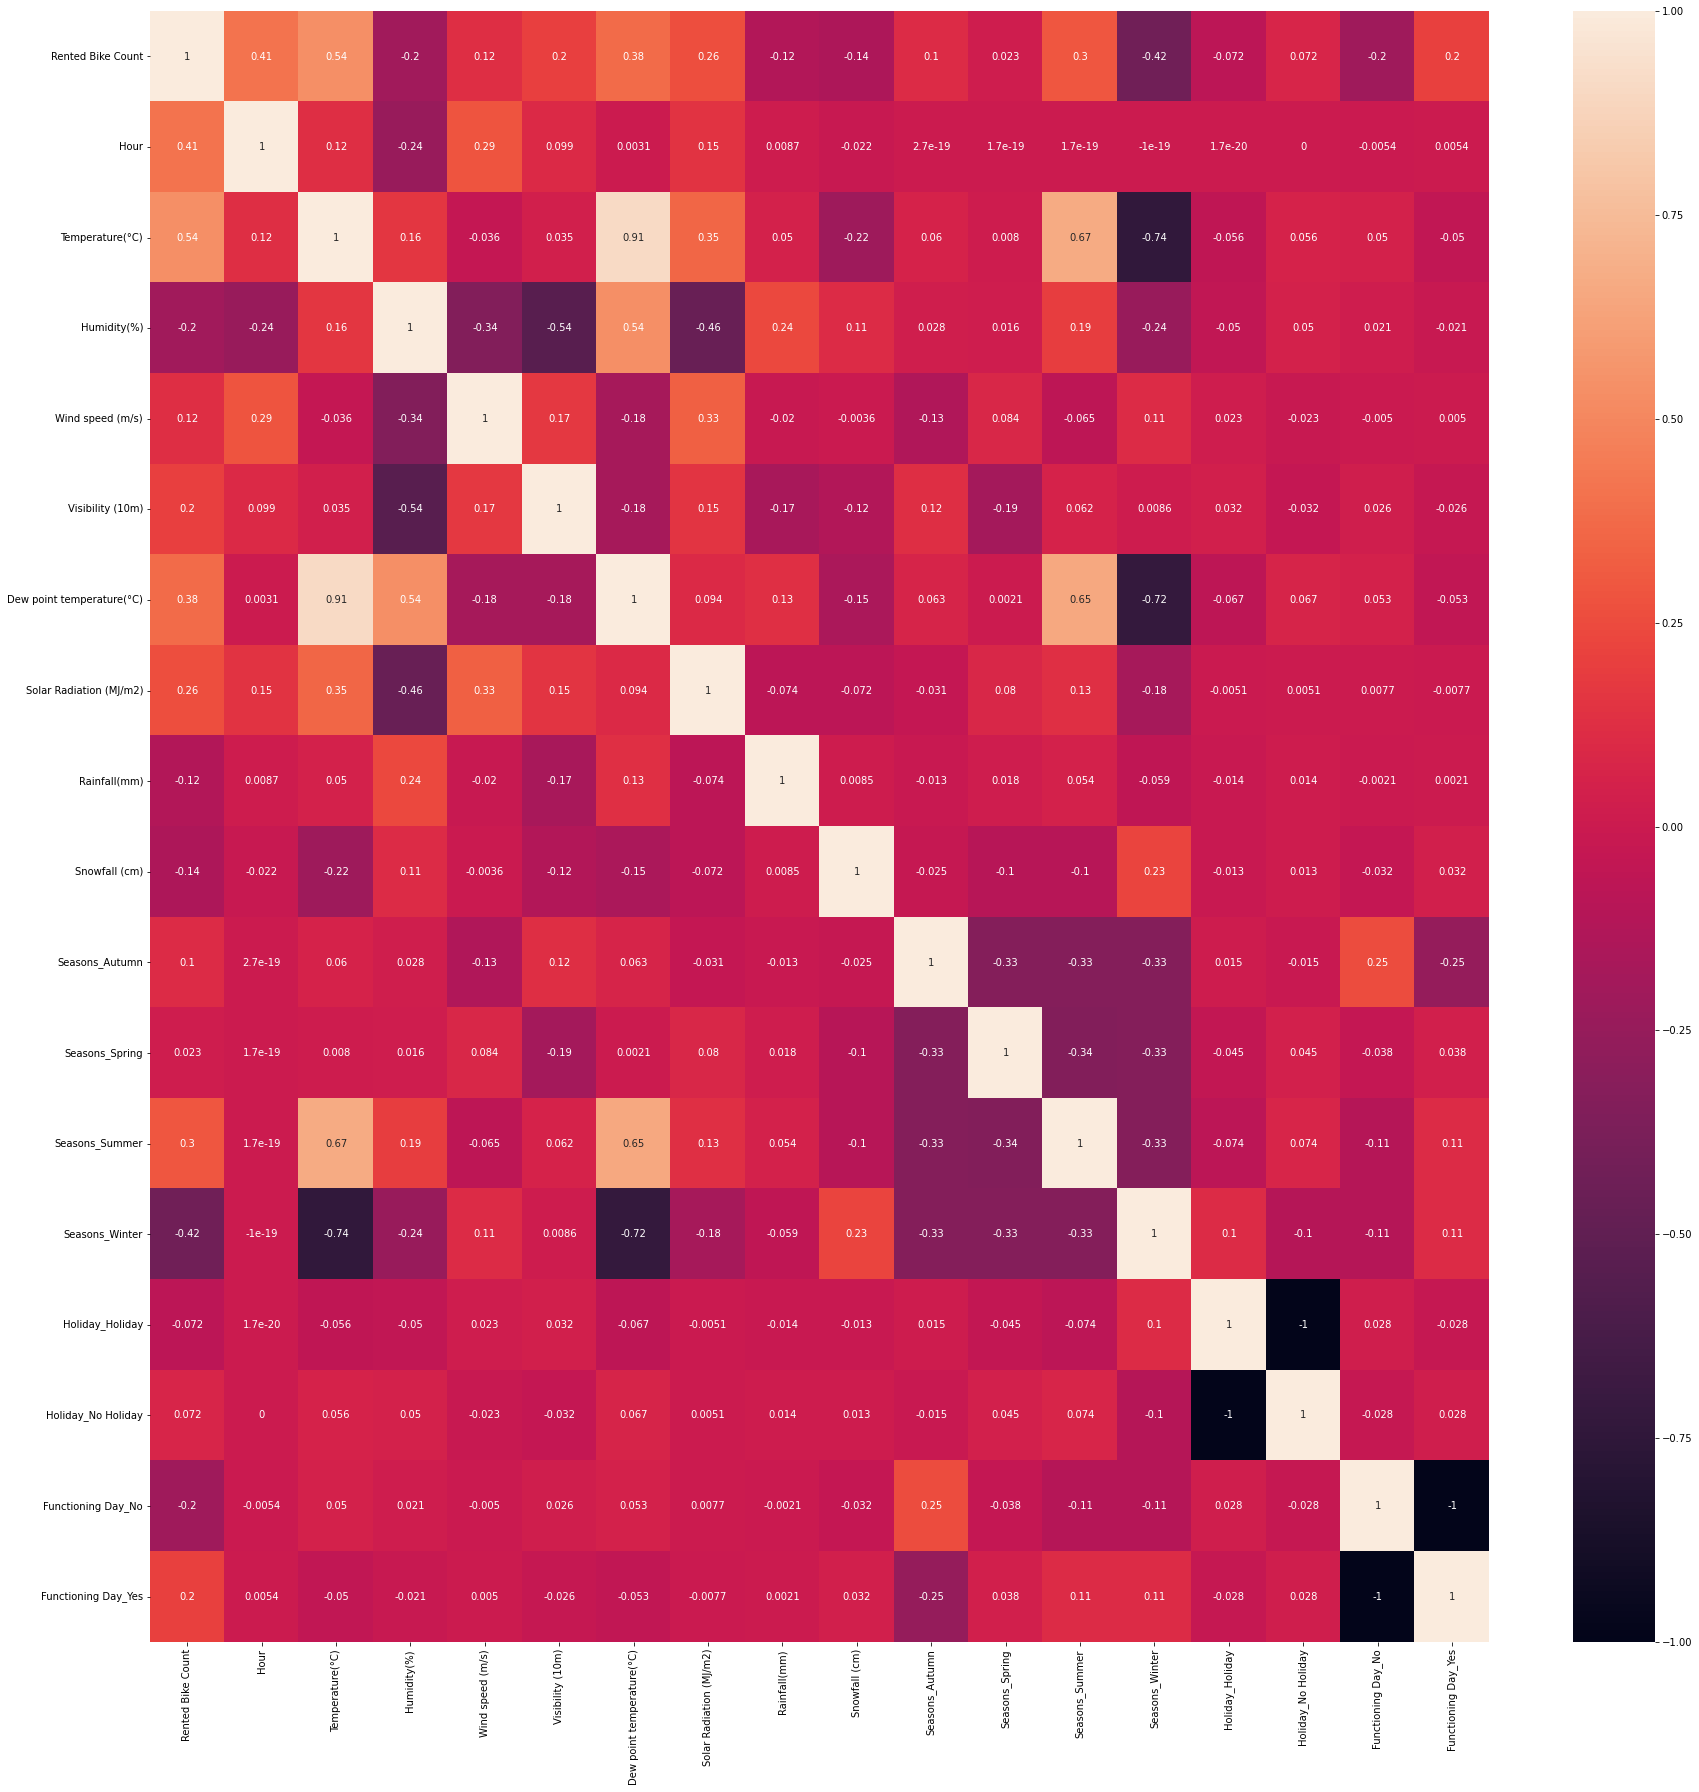

In [6]:
#heatmap to study correlations
plt.figure(figsize=(30,30))
sns.heatmap(file.corr(),annot=True)
plt.show()

In [7]:
#since negatively correlated with another column with correlation -1
del file['Holiday_Holiday']
del file['Functioning Day_Yes']
#since highly positively correlated with temperature column
del file['Dew point temperature(°C)']

In [8]:
#normalizing the data
def normalize(df):
  #function to normalize data
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

normalized_data = normalize(file)

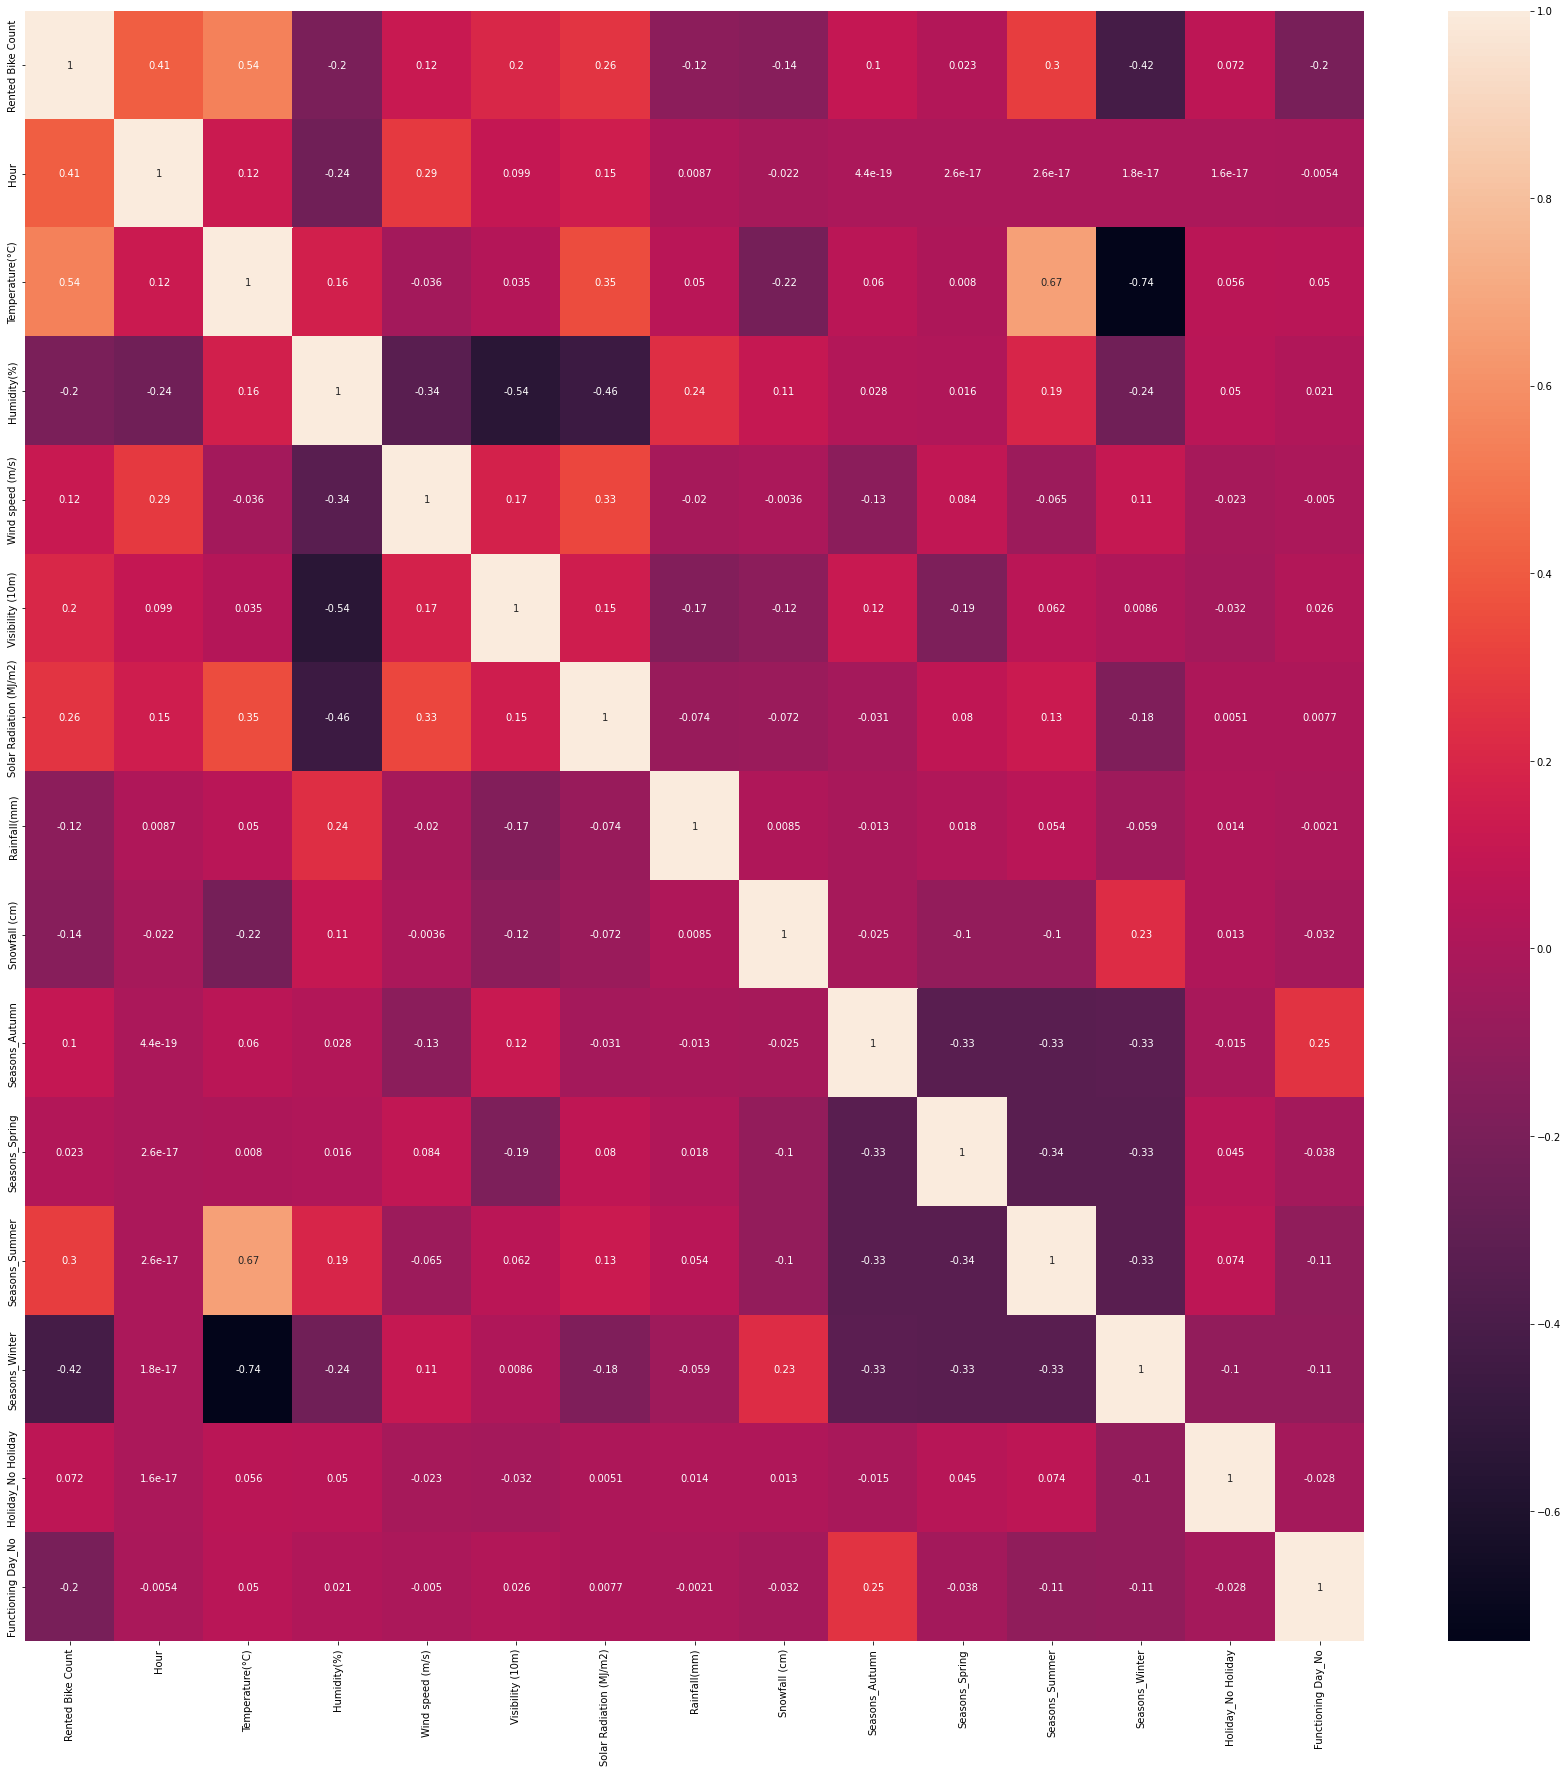

In [9]:
#heatmap of correlations of normalized data
plt.figure(figsize=(30,30))
sns.heatmap(normalized_data.corr(),annot=True)
plt.show()

### Thus all the remaining columns can be used for the regression problem

# g)

#h)
# Sampling Data

In [10]:
xlabels = [i for i in normalized_data.columns if(i!='Rented Bike Count')]
ylabels = ['Rented Bike Count']

#randomly sampling data in 70:15:15 ratio
#this is the final data we use for testing all models
test = normalized_data.sample(frac = 0.15)
display(test)

validate_train = normalized_data.drop(test.index)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_No
6534,0.080146,0.260870,0.734266,0.979592,0.216216,0.597567,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6536,0.374016,0.347826,0.741259,0.979592,0.135135,0.433857,0.053977,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7080,0.267998,0.000000,0.652098,0.826531,0.148649,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1009,0.027840,0.043478,0.071678,0.479592,0.405405,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1677,0.075366,0.913043,0.253497,0.428571,0.148649,0.795236,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,0.067492,0.000000,0.741259,0.979592,0.094595,0.142423,0.000000,0.014286,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2674,0.125422,0.434783,0.396853,0.571429,0.256757,0.736442,0.500000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0
876,0.079584,0.521739,0.311189,0.357143,0.310811,0.833756,0.303977,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0
157,0.110799,0.565217,0.382867,0.377551,0.418919,0.881906,0.323864,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0


#Using DTR

In [11]:
from sklearn.tree import DecisionTreeRegressor
xlabels = [i for i in normalized_data.columns if(i!='Rented Bike Count')]
ylabels = ['Rented Bike Count']

train = validate_train.sample(frac = 70/85)
validate = validate_train.drop(train.index)
dtree = DecisionTreeRegressor()

#i) similarly performing for all the other frameworks

### Hyperparameters of DTR

Reference: Sklearn Documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

In [12]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### Using GridSearch to find optimal Hyperparameters

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'splitter':['best','random'],'min_samples_split': [2,3,5,10], 'min_samples_split': [2,3,5,10],'ccp_alpha': [0.0,0.1,0.5]}
#using default 5 fold cross validation of validate dataset
gridsearch = GridSearchCV(estimator=dtree,param_grid=param_grid)
gridsearch.fit(validate[xlabels],validate[ylabels].values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.5],
                         'min_samples_split': [2, 3, 5, 10],
                         'splitter':

#j) similarly performing for all the other frameworks

In [14]:
gridsearch.best_params_

{'ccp_alpha': 0.0, 'min_samples_split': 10, 'splitter': 'random'}

In [15]:
dtree = DecisionTreeRegressor(ccp_alpha=0,min_samples_split=10,splitter='random').fit(train[xlabels], train[ylabels].values.ravel())

# Using SVM

In [16]:
from sklearn.svm import SVR

train = validate_train.sample(frac = 70/85)
validate = validate_train.drop(train.index)
supportvec = SVR()

### Hyperparameters of SVM Regression

Reference: Sklearn Documentation https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR 

In [17]:
supportvec.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Using GridSearch to find optimal Hyperparameters

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,10,50,100],'epsilon':[0.1,0.5,1,2,5],'kernel':['linear', 'rbf','poly']}
#using default 5 fold cross validation of validate dataset
gridsearch = GridSearchCV(estimator=supportvec,param_grid=param_grid)
gridsearch.fit(validate[xlabels],validate[ylabels].values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 50, 100], 'epsilon': [0.1, 0.5, 1, 2, 5],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
gridsearch.best_params_

{'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

In [20]:
supportvec = SVR(C=1,epsilon=0.1,kernel='rbf').fit(train[xlabels], train[ylabels].values.ravel())

# Using LASSO Regression

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso()

train = validate_train.sample(frac = 70/85)
validate = validate_train.drop(train.index)

### Hyperparameters of Lasso

Reference: Sklearn Documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [22]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

### Using GridSearch to find optimal Hyperparameters

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.001,0.01,0.1,1,2,5,10,100], 'tol':[0.0001,0.001,0.01,0.1]}
#using default 5 fold cross validation of validate dataset
gridsearch = GridSearchCV(estimator=lasso,param_grid=param_grid)
gridsearch.fit(validate[xlabels],validate[ylabels].values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 2, 5, 10, 100],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
gridsearch.best_params_

{'alpha': 0.001, 'tol': 0.1}

In [25]:
lasso = Lasso(alpha=0.001,tol=0.1).fit(train[xlabels], train[ylabels].values.ravel())

#Using Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

train = validate_train.sample(frac = 70/85)
validate = validate_train.drop(train.index)

### Hyperparameters of Random Forest Regressor

Reference: Sklearn Documentation https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [27]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Using GridSearch to find optimal Hyperparameters

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[20,40,60,80,100],  'min_samples_leaf': [1,2,3], 'min_samples_split': [2,3,5],'ccp_alpha':[0.0,0.01,0.1]}
#using default 5 fold cross validation of validate dataset
gridsearch = GridSearchCV(estimator=random_forest,param_grid=param_grid)
gridsearch.fit(validate[xlabels],validate[ylabels].values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [29]:
gridsearch.best_params_

{'ccp_alpha': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 60}

In [30]:
random_forest = RandomForestRegressor(min_samples_leaf=2,min_samples_split=5,n_estimators=60,ccp_alpha=0.0).fit(train[xlabels], train[ylabels].values.ravel())

# Comparing all the three for final Test Data

In [31]:
#for DTR
y_pred = dtree.predict(test[xlabels])
y_actual = test['Rented Bike Count']

from sklearn.metrics import mean_squared_error,r2_score

rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
r2 = r2_score(y_actual,y_pred)

#making dataframe to compare results of the three regression methods
result_holder = pd.DataFrame()
result_holder['Decision Tree Regressor'] = [rmse,r2]
result_holder = result_holder.transpose()
result_holder.columns = ['RMSE','R^2']
result_holder = result_holder.transpose()

#for SVM
y_pred = supportvec.predict(test[xlabels])
y_actual = test['Rented Bike Count']

rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
r2 = r2_score(y_actual,y_pred)
result_holder['Support Vector Machine'] = [rmse,r2]

#for LASSO
y_pred = lasso.predict(test[xlabels])
y_actual = test['Rented Bike Count']

rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
r2 = r2_score(y_actual,y_pred)
result_holder['Lasso Regression'] = [rmse,r2]

#for Random Forest Regression
y_pred = random_forest.predict(test[xlabels])
y_actual = test['Rented Bike Count']

rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
r2 = r2_score(y_actual,y_pred)
result_holder['Random Forest'] = [rmse,r2]

display(result_holder)

,Decision Tree Regressor,Support Vector Machine,Lasso Regression,Random Forest
RMSE,0.081830,0.096147,0.126253,0.062487
R^2,0.805809,0.731913,0.537734,0.886764


#k)
### Hence on comparing the RMSE and $R^2$ we get for this Regression Problem

### $\therefore$ **Random Forest Regressor** model to be the best model with hyperparameters

In [32]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#l)
The high $R^{2}$ value of 0.886 and low RMSE of 0.062 indicates that the regression model is indeed usable

# Question 4

## Using a similar order of approach as in Question 3

In [33]:
#merging all the 4 csv files in dataset 
df_0 = pd.read_csv('/content/drive/MyDrive/Semesters/Semester 3 2021 Autumn/DS 203/Assignments/Machine Learning/muscle_dataset/0.csv', header=None)
df_1 = pd.read_csv('/content/drive/MyDrive/Semesters/Semester 3 2021 Autumn/DS 203/Assignments/Machine Learning/muscle_dataset/1.csv', header=None)
df_2 = pd.read_csv('/content/drive/MyDrive/Semesters/Semester 3 2021 Autumn/DS 203/Assignments/Machine Learning/muscle_dataset/2.csv', header=None)
df_3 = pd.read_csv('/content/drive/MyDrive/Semesters/Semester 3 2021 Autumn/DS 203/Assignments/Machine Learning/muscle_dataset/3.csv', header=None)
df = [df_0,df_1,df_2,df_3]

main_df = pd.concat(df, axis=0, ignore_index=True)

In [34]:
display(main_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,2.0,5.0,-10.0,-17.0,-3.0,-2.0,12.0,2.0,2.0,2.0,-4.0,-28.0,1.0,-6.0,-5.0,-1.0,1.0,0.0,11.0,9.0,-4.0,14.0,2.0,-2.0,-2.0,-8.0,-17.0,1.0,-2.0,6.0,-14.0,-3.0,-4.0,-2.0,27.0,18.0,-6.0,-17.0,-4.0,1.0,-2.0,1.0,13.0,-12.0,-3.0,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11674,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,9.0,7.0,5.0,50.0,31.0,18.0,-3.0,-3.0,1.0,-2.0,17.0,-6.0,-10.0,-18.0,-11.0,-5.0,-2.0,-2.0,10.0,21.0,-2.0,15.0,5.0,-2.0,-2.0,-6.0,-6.0,-50.0,-16.0,7.0,-12.0,-2.0,-3.0,1.0,21.0,48.0,12.0,-12.0,-1.0,3.0,2.0,5.0,-12.0,-8.0,5.0,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11675,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,4.0,0.0,-3.0,33.0,-2.0,-1.0,-1.0,2.0,-3.0,0.0,-38.0,-25.0,0.0,3.0,2.0,-1.0,0.0,-3.0,14.0,0.0,-1.0,-3.0,-3.0,-4.0,-3.0,-6.0,-2.0,13.0,-5.0,-19.0,-6.0,-5.0,-4.0,1.0,41.0,-10.0,-4.0,-9.0,3.0,3.0,2.0,3.0,1.0,50.0,12.0,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11676,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,-1.0,-1.0,-5.0,12.0,1.0,-19.0,0.0,-4.0,-4.0,0.0,25.0,0.0,3.0,-5.0,1.0,1.0,-2.0,-4.0,-31.0,-17.0,-7.0,5.0,3.0,-5.0,-3.0,-1.0,4.0,-48.0,-13.0,-5.0,-14.0,6.0,5.0,6.0,-3.0,79.0,15.0,-6.0,-3.0,-1.0,-3.0,-1.0,-1.0,27.0,-2.0,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


### It is an **Supervised Learning Problem** as the machine is provided with a set of inputs so that the supervised learning algorithm analyses the training data and produces a correct integer outcome in $\{0,1,2,3\}$

### Target Variable - **Column Indexed 64** - Discrete Integer

## It is a **Classification Problem** to predict the Hand Gesture (Column Index 64) as $\{0 \implies Rock,1 \implies Scissors,2 \implies Paper,3 \implies Ok \}$ 

(source for information dataset) : https://www.kaggle.com/kyr7plus/emg-4

### Hence taking Accuracy and $F_{1}$ Score as performance parameters to access the model

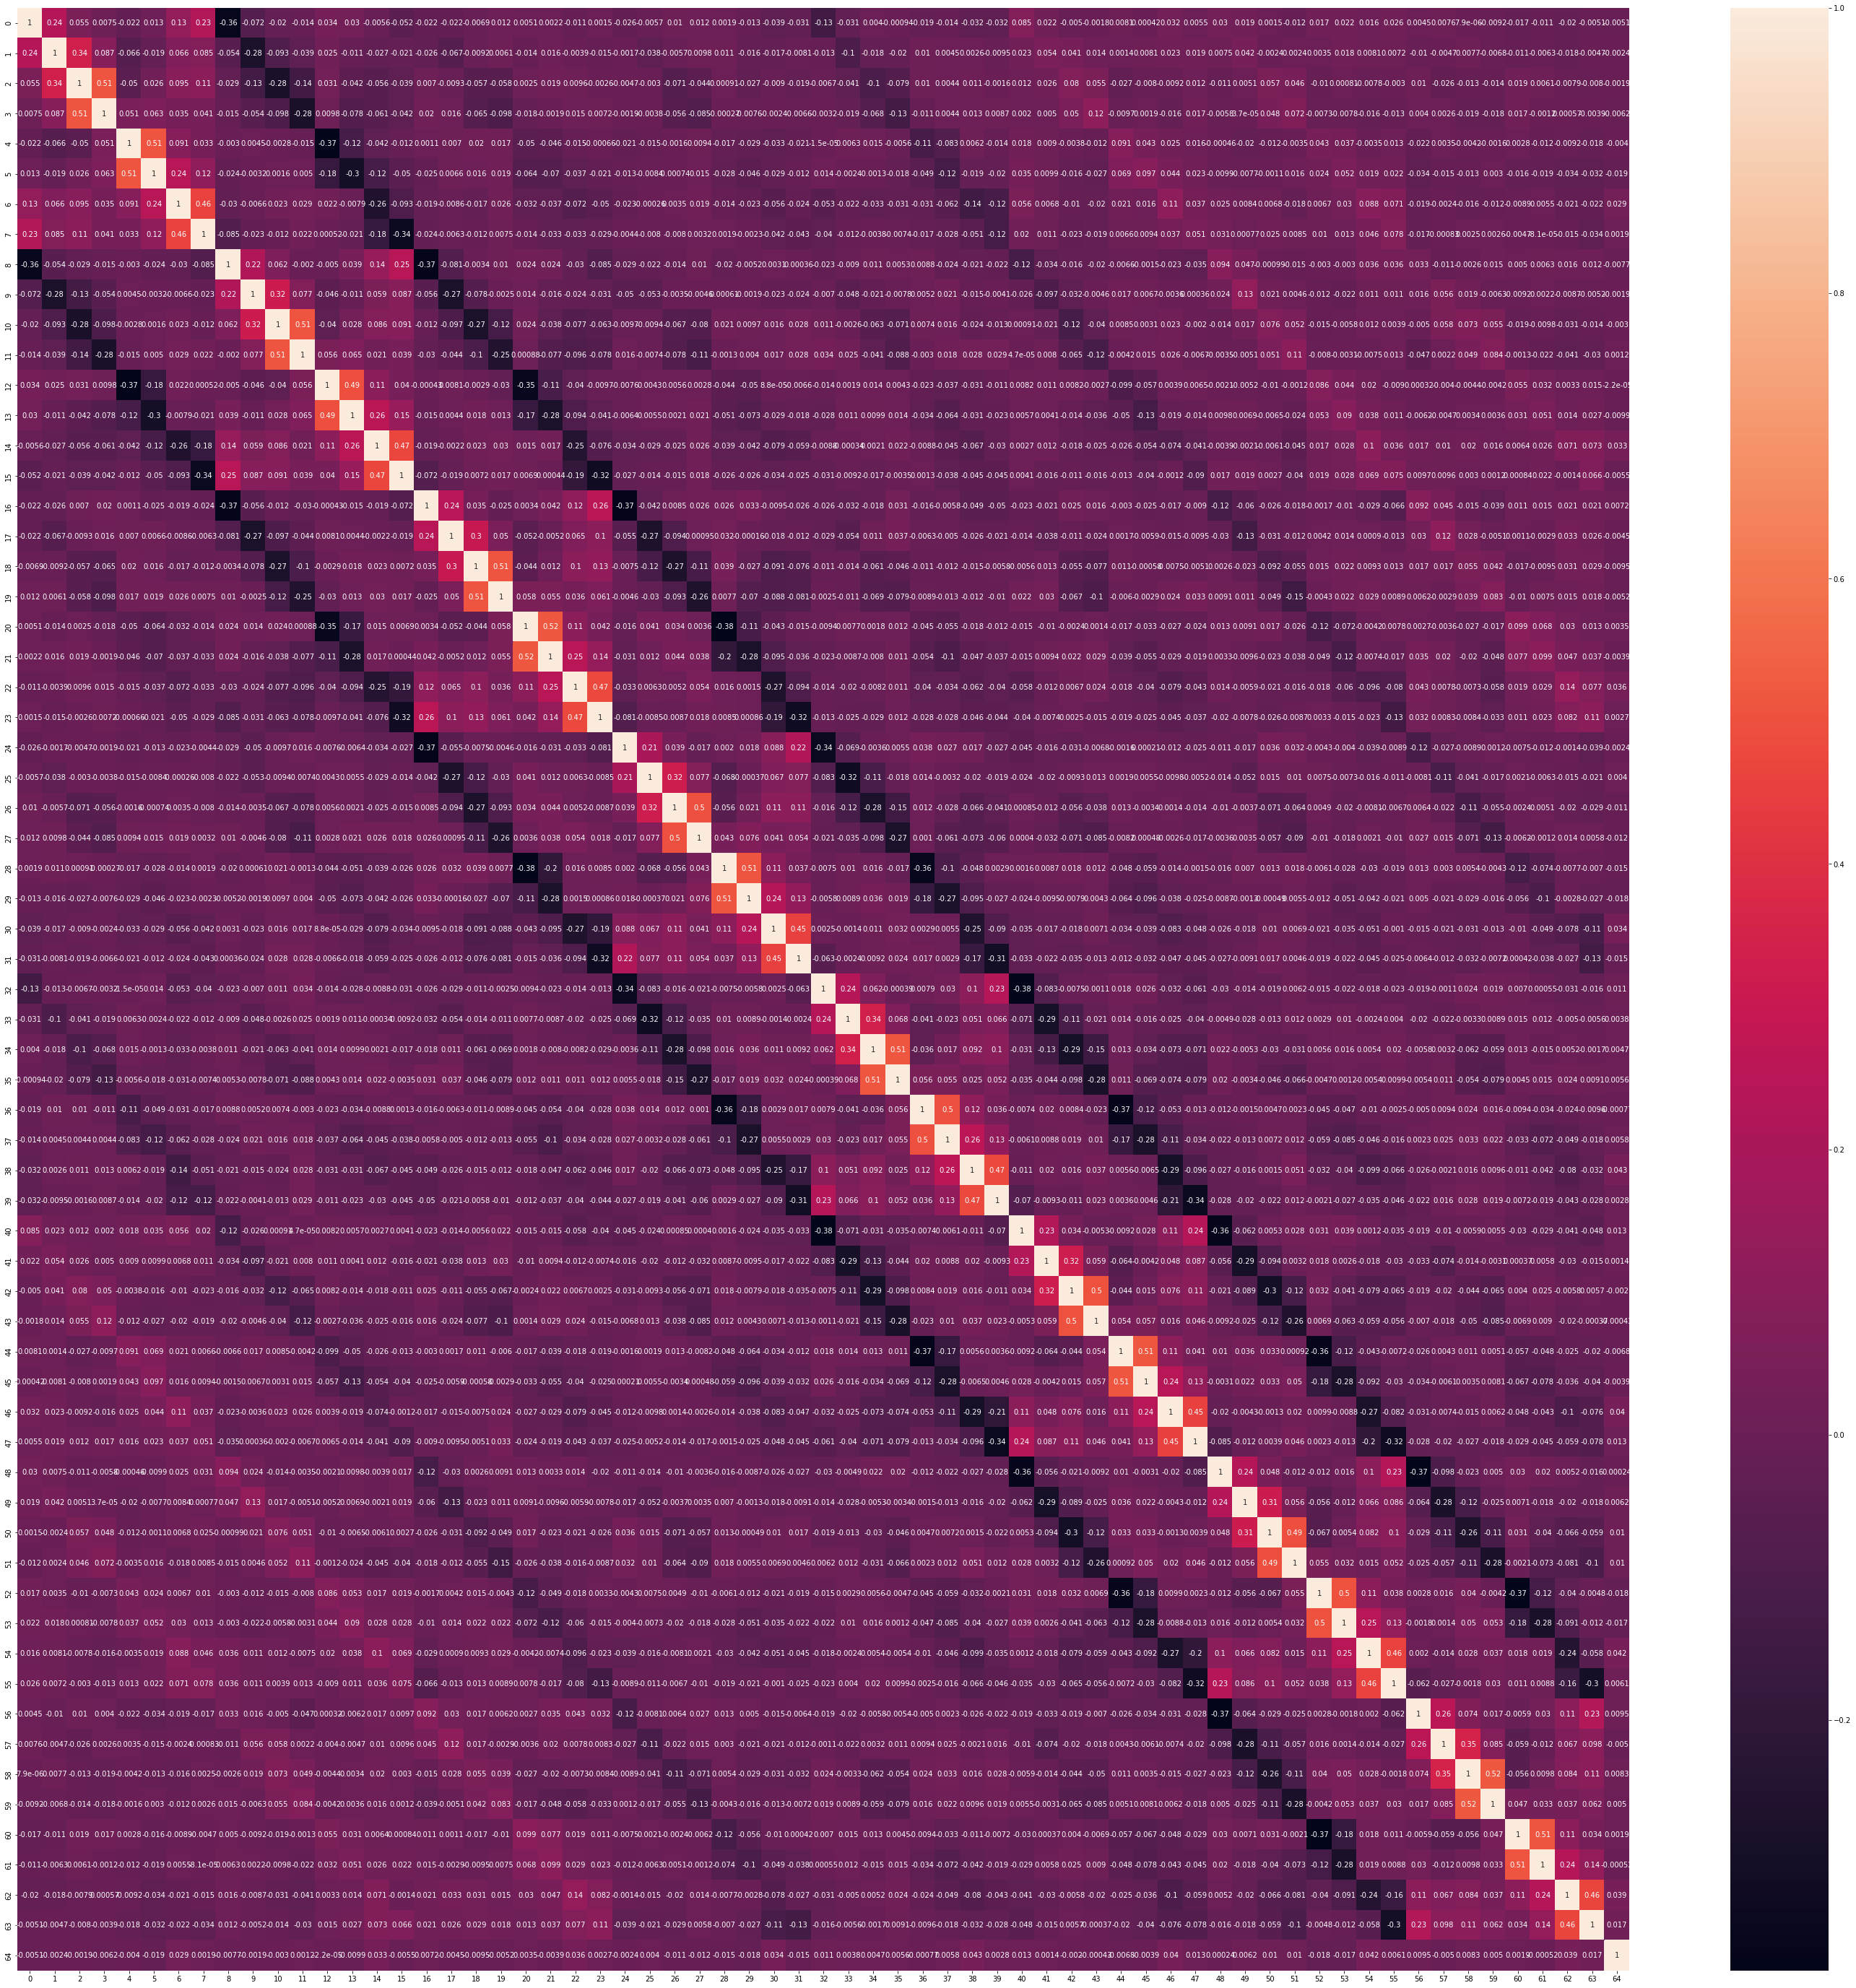

In [35]:
#heatmap to study correlations
plt.figure(figsize=(50,50))
sns.heatmap(main_df.corr(),annot=True)
plt.show()

## There are no columns that are heavily correlated with each other hence we take all columns

In [36]:
#normalizing the data
main_df[[i for i in range(0,64)]]
normalized_df = normalize(main_df[[i for i in range(0,64)]])
normalized_df[64] = main_df[64]
display(normalized_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0.625551,0.556701,0.567164,0.638462,0.563380,0.437751,0.074510,0.244094,0.426160,0.555556,0.512821,0.668966,0.454054,0.384314,0.035294,0.325490,0.552846,0.506608,0.513889,0.616438,0.673575,0.566802,0.858824,0.836283,0.359649,0.478992,0.424242,0.690647,0.545045,0.580392,0.258824,0.427451,0.575758,0.532710,0.58,0.602837,0.389189,0.498039,0.188235,0.517647,0.476987,0.504425,0.259615,0.390977,0.419355,0.428,0.239216,0.470588,0.420833,0.523810,0.495495,0.611111,0.521531,0.458824,0.584314,0.413223,0.728395,0.566524,0.720000,0.632,0.502347,0.474510,0.270588,0.557769,0
1,0.303965,0.505155,0.417910,0.523077,0.629108,0.485944,0.639216,0.464567,0.506329,0.529915,0.461538,0.627586,0.383784,0.372549,0.313725,0.298039,0.621951,0.524229,0.597222,0.616438,0.652850,0.740891,0.800000,0.738938,0.355263,0.453782,0.318182,0.661871,0.486486,0.517647,0.066667,0.494118,0.419913,0.556075,0.67,0.680851,0.524324,0.509804,0.800000,0.513725,0.535565,0.522124,0.375000,0.548872,0.566820,0.480,0.501961,0.470588,0.366667,0.502165,0.477477,0.567901,0.550239,0.494118,0.090196,0.425620,0.670782,0.575107,0.693333,0.632,0.544601,0.584314,0.937255,0.553785,0
2,0.427313,0.494845,0.373134,0.515385,0.469484,0.465863,0.192157,0.551181,0.464135,0.568376,0.512821,0.689655,0.681081,0.537255,0.631373,0.635294,0.479675,0.462555,0.486111,0.636986,0.497409,0.441296,0.168627,0.469027,0.429825,0.474790,0.378788,0.669065,0.450450,0.384314,0.439216,0.415686,0.359307,0.490654,0.48,0.517730,0.437838,0.431373,0.203922,0.329412,0.619247,0.561947,0.413462,0.563910,0.423963,0.584,1.000000,0.772549,0.429167,0.467532,0.405405,0.537037,0.645933,0.372549,0.000000,0.185950,0.506173,0.579399,0.626667,0.528,0.516432,0.584314,0.949020,0.685259,0
3,0.519824,0.551546,0.492537,0.592308,0.568075,0.578313,0.917647,0.448819,0.396624,0.538462,0.423077,0.551724,0.648649,0.584314,0.466667,0.509804,0.451220,0.480176,0.569444,0.712329,0.461140,0.425101,0.552941,0.464602,0.521930,0.466387,0.348485,0.625899,0.351351,0.396078,0.000000,0.415686,0.437229,0.500000,0.48,0.602837,0.648649,0.466667,0.392157,0.509804,0.414226,0.566372,0.451923,0.578947,0.479263,0.540,0.709804,0.580392,0.650000,0.480519,0.441441,0.500000,0.526316,0.474510,0.290196,0.371901,0.432099,0.566524,0.706667,0.680,0.638498,0.654902,0.968627,0.665339,0
4,0.537445,0.536082,0.492537,0.561538,0.502347,0.530120,0.301961,0.523622,0.493671,0.547009,0.512821,0.668966,0.621622,0.439216,0.325490,0.474510,0.142276,0.444934,0.486111,0.650685,0.347150,0.380567,0.000000,0.278761,0.802632,0.495798,0.303030,0.597122,0.549550,0.549020,0.843137,0.721569,0.437229,0.532710,0.56,0.553191,0.535135,0.560784,0.450980,0.501961,0.443515,0.535398,0.403846,0.654135,0.460829,0.468,0.286275,0.407843,0.537500,0.541126,0.531532,0.543210,0.612440,0.549020,0.737255,0.685950,0.333333,0.515021,0.640000,0.640,0.422535,0.407843,0.062745,0.219124,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,0.497797,0.530928,0.477612,0.569231,0.436620,0.570281,0.521569,0.503937,0.443038,0.547009,0.487179,0.613793,0.497297,0.435294,0.490196,0.494118,0.532520,0.488987,0.555556,0.691781,0.512953,0.372470,0.505882,0.495575,0.451754,0.478992,0.439394,0.683453,0.536036,0.537255,0.486275,0.556863,0.458874,0.514019,0.54,0.546099,0.421622,0.505882,0.494118,0.525490,0.447699,0.517699,0.336538,0.578947,0.594470,0.564,0.478431,0.435294,0.516667,0.523810,0.468468,0.537037,0.622010,0.454902,0.490196,0.516529,0.481481,0.566524,0.653333,0.624,0.244131,0.309804,0.521569,0.458167,3
11674,0.453744,0.510309,0.432836,0.553846,0.549296,0.393574,0.462745,0.472441,0.548523,0.585470,0.576923,0.627586,0.578378,0.6

In [37]:
xlabels = [i for i in range(0,64)]
ylabels = [64]

#randomly sampling data in 70:15:15 ratio

test = normalized_df.sample(frac = 0.15)
#this is the final data we use for testing all models
display(test)

validate_train = normalized_df.drop(test.index)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
10486,0.453744,0.530928,0.462687,0.561538,0.553991,0.417671,0.490196,0.519685,0.438819,0.542735,0.474359,0.572414,0.572973,0.521569,0.494118,0.443137,0.495935,0.462555,0.458333,0.671233,0.725389,0.688259,0.517647,0.566372,0.425439,0.491597,0.424242,0.654676,0.189189,0.250980,0.498039,0.443137,0.458874,0.514019,0.53,0.617021,0.518919,0.458824,0.517647,0.611765,0.502092,0.535398,0.394231,0.616541,0.474654,0.540,0.521569,0.549020,0.520833,0.515152,0.459459,0.518519,0.545455,0.431373,0.486275,0.508264,0.473251,0.545064,0.586667,0.576,0.596244,0.584314,0.474510,0.454183,3
5498,0.497797,0.505155,0.492537,0.600000,0.624413,0.550201,0.517647,0.492126,0.383966,0.581197,0.474359,0.579310,0.664865,0.517647,0.490196,0.501961,0.443089,0.475771,0.500000,0.671233,0.538860,0.481781,0.482353,0.486726,0.429825,0.487395,0.454545,0.690647,0.423423,0.407843,0.494118,0.486275,0.502165,0.546729,0.53,0.553191,0.551351,0.486275,0.490196,0.513725,0.527197,0.491150,0.346154,0.578947,0.566820,0.572,0.513725,0.509804,0.508333,0.510823,0.504505,0.555556,0.526316,0.533333,0.498039,0.508264,0.292181,0.519313,0.586667,0.576,0.417840,0.498039,0.466667,0.422311,1
902,0.550661,0.572165,0.477612,0.607692,0.516432,0.413655,0.545098,0.500000,0.451477,0.500000,0.512821,0.531034,0.459459,0.407843,0.164706,0.478431,0.500000,0.524229,0.388889,0.609589,0.616580,0.408907,0.600000,0.380531,0.307018,0.436975,0.212121,0.625899,0.490991,0.498039,0.898039,0.670588,0.774892,0.560748,0.69,0.581560,0.545946,0.564706,0.505882,0.545098,0.359833,0.473451,0.384615,0.631579,0.493088,0.600,0.443137,0.564706,0.595833,0.528139,0.531532,0.641975,0.602871,0.486275,0.250980,0.504132,0.469136,0.549356,0.493333,0.384,0.375587,0.450980,0.298039,0.406375,0
4795,0.533040,0.515464,0.432836,0.553846,0.619718,0.578313,0.501961,0.500000,0.405063,0.534188,0.410256,0.572414,0.762162,0.552941,0.486275,0.458824,0.520325,0.497797,0.611111,0.726027,0.383420,0.319838,0.501961,0.539823,0.486842,0.474790,0.363636,0.654676,0.441441,0.454902,0.501961,0.509804,0.463203,0.528037,0.55,0.595745,0.491892,0.541176,0.509804,0.494118,0.456067,0.535398,0.355769,0.593985,0.589862,0.564,0.498039,0.462745,0.487500,0.506494,0.477477,0.500000,0.550239,0.505882,0.505882,0.508264,0.473251,0.536481,0.586667,0.584,0.600939,0.623529,0.513725,0.501992,1
6533,0.594714,0.536082,0.552239,0.615385,0.516432,0.514056,0.501961,0.547244,0.396624,0.602564,0.371795,0.531034,0.627027,0.498039,0.454902,0.462745,0.504065,0.400881,0.486111,0.705479,0.502591,0.425101,0.513725,0.548673,0.407895,0.457983,0.348485,0.676259,0.518018,0.529412,0.466667,0.458824,0.627706,0.626168,0.60,0.602837,0.427027,0.474510,0.556863,0.517647,0.418410,0.438053,0.394231,0.631579,0.585253,0.516,0.478431,0.568627,0.479167,0.558442,0.459459,0.493827,0.507177,0.462745,0.462745,0.541322,0.493827,0.630901,0.453333,0.528,0.483568,0.458824,0.513725,0.498008,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,0.541850,0.577320,0.567164,0.653846,0.643192,0.586345,0.521569,0.543307,0.472574,0.551282,0.474359,0.551724,0.448649,0.450980,0.466667,0.474510,0.475610,0.458150,0.444444,0.609589,0.424870,0.404858,0.482353,0.477876,0.438596,0.483193,0.333333,0.726619,0.472973,0.639216,0.529412,0.501961,0.445887,0.584112,0.54,0.588652,0.491892,0.454902,0.462745,0.545098,0.523013,0.504425,0.451923,0.609023,0.493088,0.452,0.470588,0.403922,0.483333,0.549784,0.450450,0.543210,0.593301,0.572549,0.529412,0.603306,0.580247,0.515021,0.600000,0.592,0.394366,0.337255,0.482353,0.541833,2
4798,0.528634,0.525773,0.432836,0.546154,0.478873,0.598394,0.501961,0.507874,0.497890,0.547009,0.461538,0.600000

#Using DTC

In [38]:
from sklearn.tree import DecisionTreeClassifier

train = validate_train.sample(frac = 70/85)
validate = validate_train.drop(train.index)
dtree_classifier = DecisionTreeClassifier()

### Hyperparameters of DTC

Reference: Sklearn Documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [39]:
dtree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### Using GridSearch to find optimal Hyperparameters

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'splitter':['best','random'],'min_samples_split': [2,3,5,10], 'min_samples_split': [2,3,5,10]}
#using default 5 fold cross validation of validate dataset
gridsearch = GridSearchCV(estimator=dtree_classifier,param_grid=param_grid)
gridsearch.fit(validate[xlabels],validate[ylabels].values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': [2, 3, 5, 10],
              

In [41]:
gridsearch.best_params_

{'min_samples_split': 5, 'splitter': 'best'}

In [42]:
dtree_classifier = DecisionTreeClassifier(min_samples_split=5,splitter='best').fit(train[xlabels], train[ylabels].values.ravel())

In [43]:
dtree_classifier.fit(train[xlabels],train[ylabels])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Using SVC

In [44]:
from sklearn.svm import SVC

train = validate_train.sample(frac = 70/85)
validate = validate_train.drop(train.index)

In [45]:
supportvec_classifier = SVC()

### Hyperparameters of SVM Classifier

Reference: Sklearn Documentation https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [46]:
supportvec_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Using GridSearch to find optimal Hyperparameters

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,10,50,100],'kernel':['linear', 'rbf','poly']}
#using default 5 fold cross validation of validate dataset
gridsearch = GridSearchCV(estimator=supportvec_classifier,param_grid=param_grid)
gridsearch.fit(validate[xlabels],validate[ylabels].values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 50, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
gridsearch.best_params_

{'C': 10, 'kernel': 'rbf'}

In [49]:
supportvec_classifier = SVC(C=10,kernel='rbf').fit(train[xlabels], train[ylabels].values.ravel())

#Using Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

train = validate_train.sample(frac = 70/85)
validate = validate_train.drop(train.index)

### Hyperparameters of Random Forest Classifier

Reference: Sklearn Documentation https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [51]:
random_forest_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Using GridSearch to find optimal Hyperparameters

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[20,40,60,80,100],  'min_samples_leaf': [1,2,3], 'min_samples_split': [2,3,5],'ccp_alpha':[0.0,0.01,0.1]}
#using default 5 fold cross validation of validate dataset
gridsearch = GridSearchCV(estimator=random_forest_classifier,param_grid=param_grid)
gridsearch.fit(validate[xlabels],validate[ylabels].values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [53]:
gridsearch.best_params_

{'ccp_alpha': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [54]:
random_forest_classifier = RandomForestClassifier(min_samples_leaf=2,min_samples_split=3,n_estimators=100,ccp_alpha=0.0).fit(train[xlabels], train[ylabels].values.ravel())

# Comparing all the three for final Test Data

In [55]:
#for DTC
y_pred = dtree_classifier.predict(test[xlabels])
y_actual = test[64]

from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_actual,y_pred)
f1 = f1_score(y_actual,y_pred, average="weighted")

#making dataframe to compare results of the three regression methods
result_holder = pd.DataFrame()
result_holder['Decision Tree Classifier'] = [f1,accuracy]
result_holder = result_holder.transpose()
result_holder.columns = ['f1_score','accuracy']
result_holder = result_holder.transpose()

#for SVM Classifier
y_pred = supportvec_classifier.predict(test[xlabels])
y_actual = test[64]

accuracy = accuracy_score(y_actual,y_pred)
f1 = f1_score(y_actual,y_pred, average="weighted")

result_holder['SVM Classifier'] = [f1,accuracy]

#for Random Forest Classifier
y_pred = random_forest_classifier.predict(test[xlabels])
y_actual = test[64]

accuracy = accuracy_score(y_actual,y_pred)
f1 = f1_score(y_actual,y_pred, average="weighted")
result_holder['Random Forest'] = [f1,accuracy]

display(result_holder)

,Decision Tree Classifier,SVM Classifier,Random Forest
f1_score,0.768064,0.916220,0.919412
accuracy,0.767694,0.916667,0.919521



### **Random Forest Classifier** model is the best model for this Classification problem

### The high accuracy of $91.95 \%$ and $F_{1}$ value of 0.9194 indicates that the classification model is indeed usable


#Question 5
## Performing PCA for the (input data first 64 columns) files of the dataset for muscle activity



In [56]:
main_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,2.0,5.0,-10.0,-17.0,-3.0,-2.0,12.0,2.0,2.0,2.0,-4.0,-28.0,1.0,-6.0,-5.0,-1.0,1.0,0.0,11.0,9.0,-4.0,14.0,2.0,-2.0,-2.0,-8.0,-17.0,1.0,-2.0,6.0,-14.0,-3.0,-4.0,-2.0,27.0,18.0,-6.0,-17.0,-4.0,1.0,-2.0,1.0,13.0,-12.0,-3.0,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11674,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,9.0,7.0,5.0,50.0,31.0,18.0,-3.0,-3.0,1.0,-2.0,17.0,-6.0,-10.0,-18.0,-11.0,-5.0,-2.0,-2.0,10.0,21.0,-2.0,15.0,5.0,-2.0,-2.0,-6.0,-6.0,-50.0,-16.0,7.0,-12.0,-2.0,-3.0,1.0,21.0,48.0,12.0,-12.0,-1.0,3.0,2.0,5.0,-12.0,-8.0,5.0,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11675,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,4.0,0.0,-3.0,33.0,-2.0,-1.0,-1.0,2.0,-3.0,0.0,-38.0,-25.0,0.0,3.0,2.0,-1.0,0.0,-3.0,14.0,0.0,-1.0,-3.0,-3.0,-4.0,-3.0,-6.0,-2.0,13.0,-5.0,-19.0,-6.0,-5.0,-4.0,1.0,41.0,-10.0,-4.0,-9.0,3.0,3.0,2.0,3.0,1.0,50.0,12.0,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11676,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,-1.0,-1.0,-5.0,12.0,1.0,-19.0,0.0,-4.0,-4.0,0.0,25.0,0.0,3.0,-5.0,1.0,1.0,-2.0,-4.0,-31.0,-17.0,-7.0,5.0,3.0,-5.0,-3.0,-1.0,4.0,-48.0,-13.0,-5.0,-14.0,6.0,5.0,6.0,-3.0,79.0,15.0,-6.0,-3.0,-1.0,-3.0,-1.0,-1.0,27.0,-2.0,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


In [57]:
del main_df[64]

## Performing PCA

In [58]:
def find_std_norm(df):
  #to find the stddev of the L2 norm
  norm = np.linalg.norm(df,axis=0)
  return np.sqrt(np.var(norm))

main_std = find_std_norm(main_df)

Condition of 1% error of rmse and stdev of L2 norm of main data is satisfied for n >= 48
Hence min value of n is 48 



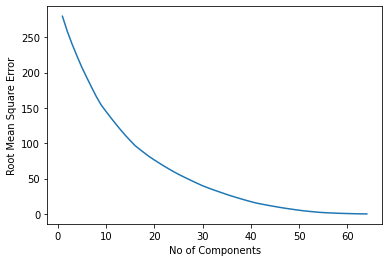

In [59]:
from sklearn.decomposition import PCA
rmse_holder=[]
found = False

for k in range(1,65):
  #using pca to decompose to k dimensions from 64 dimensions
  pca = PCA(n_components=k)
  principalComponents = pca.fit_transform(main_df)
  df_1 = pca.inverse_transform(pca.fit_transform(main_df))
  #getting back to 64 dimensions using inverse transform
  rmse =  (((main_df - df_1) ** 2).mean()).mean()
  rmse_holder += [rmse]
  #now comparing the errors
  if(abs(rmse) < 0.01*(main_std) and not found):
    print("Condition of 1% error of rmse and stdev of L2 norm of main data is satisfied for n >=",k)
    print("Hence min value of n is",k,'\n')
    found = True

#plotting the rmse 
plt.plot(range(1,65),rmse_holder)
plt.ylabel("Root Mean Square Error")
plt.xlabel("No of Components")
plt.show()